##Modeling and Training##

We are going to try a couple of classification algorithms to see which one performs better

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the train dataset into dataframes
train_df = pd.read_csv('../../dataset/cleaned_train.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size,log-ram,log-int_memory,log-battery_power
0,-0.902597,0,0.830779,0,-0.764629,0.0,-1.382405,0.339276,1.350676,-1.101463,...,0.283250,1.462493,0,0,1,1,63.0,7.843849,2.079442,6.736967
1,-0.495139,1,-1.253064,1,-0.995615,1.0,1.156334,0.686381,-0.120727,-0.664034,...,-0.635188,-0.734267,1,1,0,2,51.0,7.875499,3.988984,6.929517
2,-1.537686,1,-1.253064,1,-0.533642,1.0,0.494054,1.380591,0.133939,0.210825,...,-0.864797,-0.368140,1,1,0,2,22.0,7.864804,3.737670,6.335054
3,-1.419319,1,1.198517,0,-0.995615,0.0,-1.216835,1.033486,-0.262208,0.648255,...,0.512860,-0.002014,1,0,0,2,128.0,7.926603,2.397895,6.423247
4,1.325906,1,-0.395011,0,2.007209,1.0,0.659624,0.339276,0.020754,-1.101463,...,-0.864797,0.730240,1,1,0,1,16.0,7.252762,3.806662,7.507690


In [7]:
#Preparing the data for training and predictions
from sklearn.model_selection import train_test_split

X = train_df.drop('price_range', axis=1)

Y = train_df['price_range']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**1. Logistic Regression Classifier**

In [8]:
from sklearn.linear_model import LogisticRegression

#Intitilazie Logistic Regression CLassifier
log_clf = LogisticRegression()

#Fit the Logistic Regression Classifier
log_clf.fit(x_train, y_train)

print("Accuracy of Logistic regression training set:",log_clf.score(x_train, y_train),)
print("Accuracy of Logistic regression test set:", log_clf.score(x_test, y_test),)

Accuracy of Logistic regression training set: 0.929375
Accuracy of Logistic regression test set: 0.9275


Precision: 0.9284378195013359
Recall: 0.9275
F1-score: 0.9273926840047885


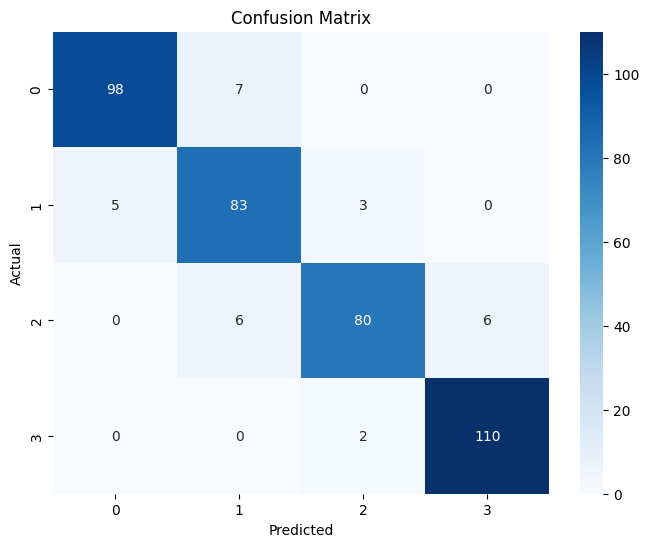

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get predictions for the test set
y_pred = log_clf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**2. Decision Tree Classifier**

Accuracy of Decision Tree training set: 1.0
Accuracy of Decision Tree test set: 0.84
Precision: 0.84386182311099
Recall: 0.84
F1-score: 0.8394230904118564


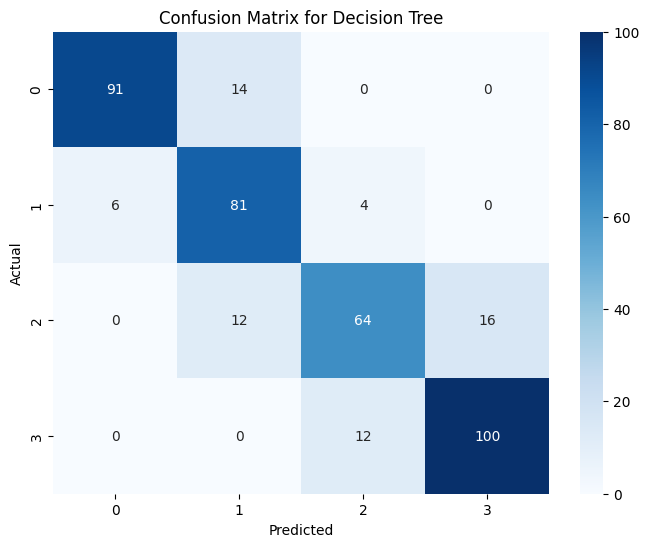

In [10]:
from sklearn.tree import DecisionTreeClassifier

#Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)

#Make predictions
y_pred_dt = dt_clf.predict(x_test)

#Evaluate the model
print("Accuracy of Decision Tree training set:", dt_clf.score(x_train, y_train))
print("Accuracy of Decision Tree test set:", dt_clf.score(x_test, y_test))

#Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

#Precision, Recall, F1-score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-score: {f1_dt}")

#Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

**3. Random Forest Classifier**

Accuracy of Random Forest training set: 1.0
Accuracy of Random Forest test set: 0.8875
Precision: 0.8903092120645312
Recall: 0.8875
F1-score: 0.8883149225780805


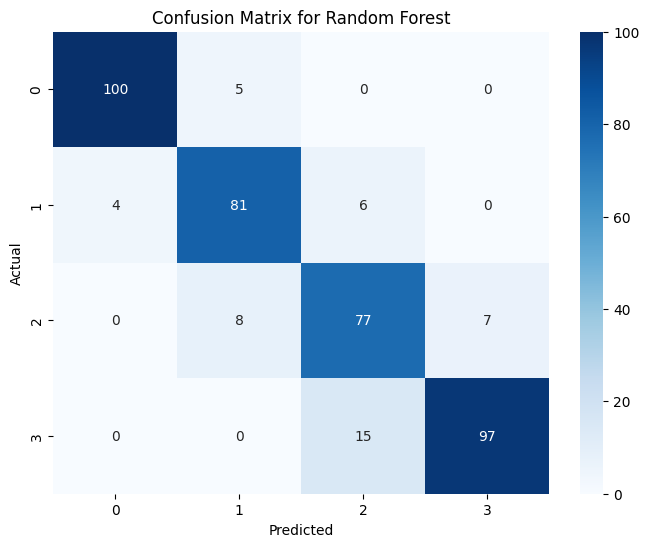

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(x_test)

# Evaluate the model
print("Accuracy of Random Forest training set:", rf_clf.score(x_train, y_train))
print("Accuracy of Random Forest test set:", rf_clf.score(x_test, y_test))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Precision, Recall, F1-score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

**4. XGBoost CLassifier**

Accuracy of XGBoost training set: 1.0
Accuracy of XGBoost test set: 0.8925
Precision: 0.8946345475944958
Recall: 0.8925


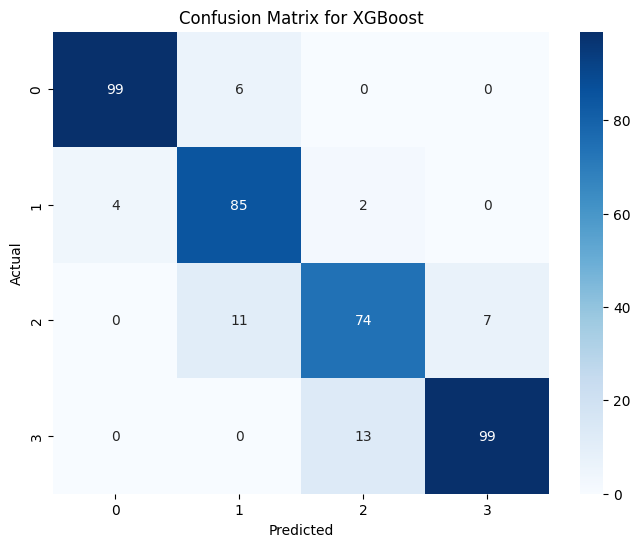

In [12]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softmax", num_class=4, random_state=42)

# Train the model
xgb_clf.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_clf.predict(x_test)

# Evaluate the model
print("Accuracy of XGBoost training set:", xgb_clf.score(x_train, y_train))
print("Accuracy of XGBoost test set:", xgb_clf.score(x_test, y_test))


# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Precision, Recall
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()

**5. SVC Classifier**

Accuracy of SVM training set: 0.984375
Accuracy of SVM test set: 0.9625
Precision: 0.9647542628843293
Recall: 0.9625
F1-score: 0.9626439853990943


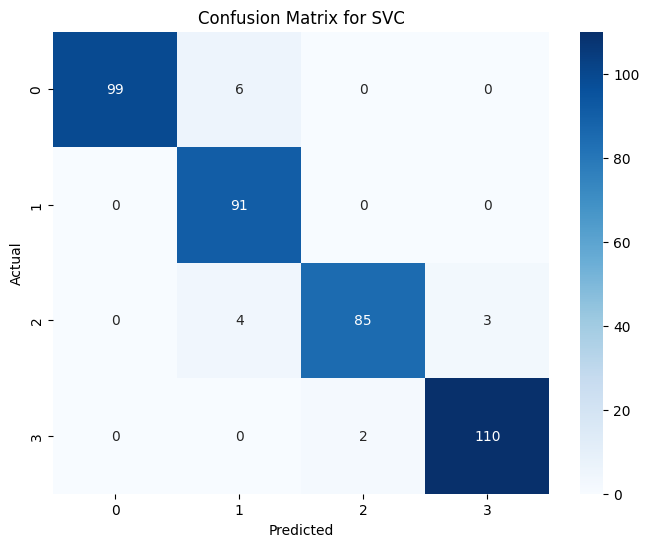

In [13]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier
svc_clf = SVC(random_state=42 , kernel='linear', C=10, gamma=1)
svc_clf.fit(x_train, y_train)

# Make predictions
y_pred_svc = svc_clf.predict(x_test)

# Evaluate the model
print("Accuracy of SVM training set:", svc_clf.score(x_train, y_train))
print("Accuracy of SVM test set:", svc_clf.score(x_test, y_test))

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Precision, Recall, F1-score
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print(f"Precision: {precision_svc}")
print(f"Recall: {recall_svc}")
print(f"F1-score: {f1_svc}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()

**Conclusion**
* We can see that both Logistic Regression and Support Vector Classifier outperform Ensemble methods (Decision Tree, Random Forest, XGBoost)
* Ensemble methods could be overfitting on trainig data due to our dataset being relatively small
* Logistic Regression and SVC could be performing better due to the fact that the data is linearly seperable

We will stick with Support Vector Classifier since it provided the best results and try to optimize it

##Hyperparameter Tuning and optimization##

In [14]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'C': [0.1, 1, 2.5, 10],
    'gamma': [1, 0.1, 2, 'scale'],
    'kernel': ['rbf', 'linear'],
    'degree': [2,3,4]
}

#Create a GridSearchCV
svc_grid = GridSearchCV(SVC(), param_grid, verbose=3, scoring='accuracy')

# Fit the grid search to the data
svc_grid.fit(x_train, y_train)

# Print the best parameters and best score
print(svc_grid.best_params_)
svc_grid.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.4s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.3s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.3s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.3s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=rbf;, score=0.253 total time=   0.3s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.944 total time=   1.4s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.956 total time=   1.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.916 total time=   0.7s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.928 total time=   0.7s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.950 total time=   0.7s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=rbf;, score=0.256 total time=   0.2s
[CV 2/5]

SVC(C=10, degree=2, gamma=1, kernel='linear')

In [15]:
svc_grid.best_score_

0.9618749999999998

Precision: 0.9647542628843293
Recall: 0.9625
F1-score: 0.9626439853990943


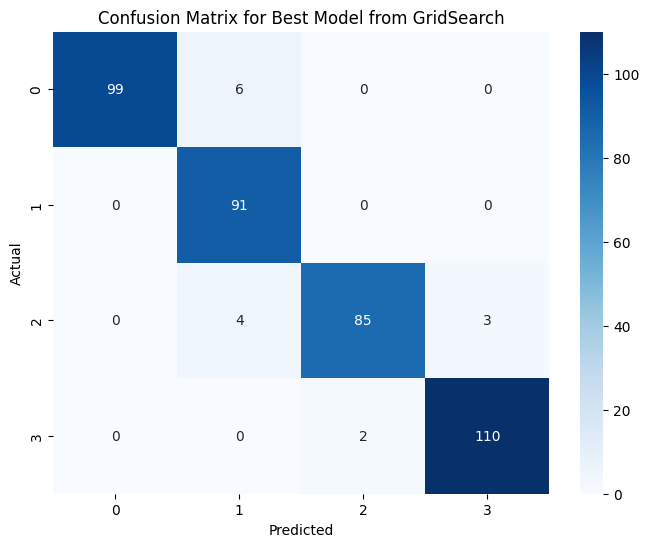

In [17]:
best_model = svc_grid.best_estimator_
y_pred_best = best_model.predict(x_test)

# Precision, Recall, F1-score
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-score: {f1_best}")

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model from GridSearch")
plt.show()

**Saving the Best Model**

In [18]:
import joblib
#Saving the trained model
joblib.dump(svc_grid, './svc_model.pkl')

['./svc_model.pkl']